# Answers to exercises chapter 1

## Exercise 1
Use the graphical method to sketch the trajectory for the recursion $x^{\prime} = x + a (x - 1)$ for $a = -1.5$, $a=-2.0$ and $a = - 2.5$

We need to produce a cobweb plot, for which you could write code yourself or get it from the internet. Below you find the code for a general function to plot a cobweb. See also [worksheet for sections 1.4 - 1.6](https://bramkuijper.github.io/mcelreath_boyd/ch1_14_end.html). It is a modification of the original source code [here](https://scipython.com/blog/cobweb-plots/).

This is just a snippet of code from the internet that I reworked. It is not required to understand it in depth, just to apply the code (see below) to make your own cobweb. What you need to do is simply call the function `plot_cobweb()` as illustrated below.

In [133]:
# import some packages

# numpy is a numerical library in python
# allowing one to do numerical things (random numbers, arrays, linear algebra, etc)
# see https://numpy.org/doc/stable/user/quickstart.html
import numpy as np

# import some graphics parameters from matplotlib (determining font & text)
from matplotlib import rc

# some additional functions from numpy
import matplotlib.pyplot as plt

# Use LaTeX throughout the figure for consistency
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)
# Figure dpi
dpi = 72

def plot_cobweb(f,
                parameters={},
                starting_value=0.1,
                n_iterations=40,
                xrange=(0,1)):
    
    """Make a cobweb plot.
    
    Parameters:
    -----------
        f: function
            recursion equation where the dynamic variable
            should be given by the name x, e.g., x*wA/(x*wA + (1-x)*wA)
            
        parameters: dict
            a dictionary with parameter names and values
            if the equation is, say, x*a*c where x is the variable
            in question and a and c are parameters, we need to provide
            parameters={"a":1.5,"c":0.9}
            
        starting_value: float
            the starting value of the variable
        
        n_iterations: int
            number of times we evaluate f
            
        xrange: tuple
            a tuple with the minimum and the maximum xrange
        
    Returns:
    --------
    Nothing
        

    """
    
    # make a big series of 500 evenly spaced points
    # from min to max along x-axis
    x = np.linspace(start=xrange[0], stop=xrange[1], num=500)
    
    # make a figure of a certain size and dpi
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x)
    ax.plot(x, f(x, **parameters), color="black", linewidth=2)
    
    # Plot y = x
    ax.plot(x, x, color="grey", lw=1)

    # create the cobweb by iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,n_iterations+1,2))
    px[0], py[0] = starting_value, 0
    for n in range(1, n_iterations, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], **parameters)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, color="blue", alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
#    ax.set_ylabel(f.latex_label)

    # make a title containing start value
    # and any parameters
    title_str = f"$x_0 = ${starting_value}"
    
    for param_name, param_value in parameters.items():
        title_str += ", " + param_name + "=" + str(param_value)

    ax.set_title(label=title_str)

    plt.show()

class AnnotatedFunction:
    """A small class representing a mathematical function.

    This class is callable so it acts like a Python function, but it also
    defines a string giving its latex representation.

    """

    def __init__(self, func, latex_label):
        self.func = func
        self.latex_label = latex_label

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

Now define the recursion equation we want to plot as a Python [function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions):

In [134]:
# define the recursion equation
def func(x, a):
    return(x + a*(x-1))

Now produce the cobweb plots by calling the function `plot_cobweb()` that was defined in the snippet of code above.

### Cobweb for $a=-1.5$
First for the value of $a=-1.5$, we find that there is a stable point, as the recursion (blue line) spirals inwards from its starting value $x_{0} = 0.2$:

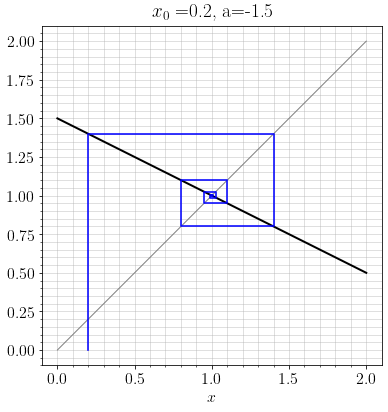

In [135]:
plot_cobweb(f=func,
            parameters={"a":-1.5},
            starting_value=0.2,
            xrange=(0,2))

This makes sense, as we find that for $a=-1.5$ the derivative of $x^{\prime}$ with respect to $x$ is between -1 and 1, or: \begin{align}\left . -1 < \frac{\mathrm{d} x^{\prime}}{\mathrm{d}x}\right |_{a=-1.5} < 1.\end{align}

To see this, calculate the derivative $\frac{\mathrm{d} x^{\prime}}{\mathrm{d}x}$, which is 
\begin{align} \frac{\mathrm{d} x^{\prime}}{\mathrm{d}x} &= \frac{\mathrm{d}}{\mathrm{d}x} \left [x + a(x-1) \right]\\
&=1 + a.
\end{align}

Hence, when $a=-1.5$ we have
\begin{align} \left . \frac{\mathrm{d} x^{\prime}}{\mathrm{d}x} \right |_{a=-1.5} &= \left . 
\left ( 1 + a \right ) \right |_{a=-1.5} =  - 0.5,
\end{align}
which lies within the -1 and 1 interval.

### Cobweb for $a=-2$

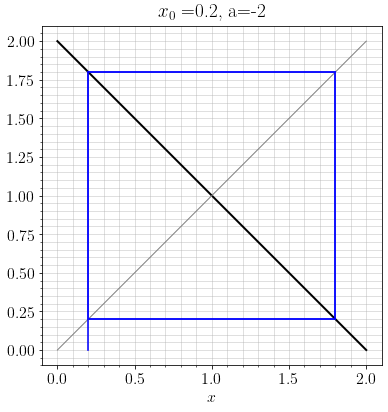

In [136]:
plot_cobweb(f=func,
            parameters={"a":-2},
            starting_value=0.2,
            xrange=(0,2))

We find that we get stable cycles (hence the equilibrium is unstable) when $a=-2$, as we have
\begin{align} \left . \frac{\mathrm{d} x^{\prime}}{\mathrm{d}x} \right |_{a=-2} &= \left . 
\left ( 1 + a \right ) \right |_{a=-2} =  -1
\end{align}
so that the stability condition \begin{align} -1 < \left . \frac{\mathrm{d} x^{\prime}}{\mathrm{d}x} \right |_{a=-2} < 1 \end{align} is **not** met. However, as the derivative is right at the boundary of -1, we find it is cycling back and forth between a set of similar values.

### Cobweb for $a=-2.5$

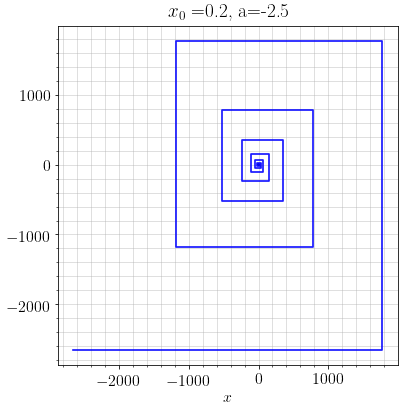

In [137]:
plot_cobweb(f=func,
            parameters={"a":-2.5},
            starting_value=0.2,
            xrange=(0,2))

The derivative is now far smaller than -1, so we find that the system is unstable and spirals outwards towards values of $x$ of an ever larger magnitude.

# Exercise 2: two-way mutation

### Equilibrium

Solve for the equilibrium/equilibria of the system
\begin{align}p^{\prime} &= p - m_{12} p + m_{21} (1-p).
\end{align}

To find equilibria, we have to find for which allele frequencies $\hat{p}$ there is no change in allele frequency between time steps, i.e., when $p^{\prime} = p$.

To find the equilibria, we set $p^{\prime}$ equal to $p$ and write $p$ as $\hat{p}$. Doing so, we have
\begin{align}
\hat{p} &= \hat{p} - m_{12} \hat{p} + m_{21} \left ( 1-\hat{p} \right ).
\end{align}

Then, subtracting $\hat{p}$ from both sides, we have
\begin{align}
0 &= - m_{12} \hat{p} + m_{21} \left ( 1-\hat{p} \right ).
\end{align}

Collecting terms of $-\hat{p}$:
\begin{align}
0 &= -\hat{p} \left [m_{12} + m_{21} \right ] + m_{21}.
\end{align}

Subtracting $m_{21}$ from both sides:
\begin{align}
-m_{21} &= -\hat{p} \left [m_{12} + m_{21} \right ].
\end{align}

Divide both sides by $m_{12} + m_{21}$:
\begin{align}
\frac{-m_{21}}{m_{12} + m_{21}} &= -\hat{p}.
\end{align}

Multiply both sides by $-1$:
\begin{align}
\frac{m_{21}}{m_{12} + m_{21}} &= \hat{p}.
\end{align}

And we are done.

### Solving for the equilibria in `sympy`
First load sympy and turn on beautified printing():

In [138]:
from sympy import *
init_printing()

To solve the recursion
\begin{align}p^{\prime} &= p - m_{12} p + m_{21} (1-p).
\end{align}
for equilibria in `sympy`, we use the [`solve()`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve) command. 

However, `sympy` only accepts difference equations to solve, so we need to feed it $\Delta p = p^{\prime} - p$, which can easily be achieved by subtracting $p$ from both sides in the recursion above:

\begin{align}
\Delta p &= p - m_{12} p + m_{21} (1-p) - p.
\end{align}

In [139]:
# first declare p, phat, m12 and m21 as mathematical symbols, rather than python variables:
p, phat, m12, m21 = symbols("p phat m12 m21")

# now specify the difference equation Δp
deltap=p - m12*p + m21*(1-p) - p

# substitute p = phat:
deltap_subs = deltap.subs(p,phat)

# print the resulting difference equation for sake of clarity:
deltap_subs

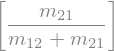

In [140]:
# solve for phat:
solve(deltap_subs,phat)

and we have derived the equilibrium in `sympy`.

### Stability of the equilibrium

To calculate whether $\hat{p} = \frac{m_{21}}{m_{12} + m_{21}}$ is stable, we need to check whether
\begin{align} -1 < \left . \frac{\mathrm{d} p^{\prime}}{\mathrm{d} p} \right |_{p = \hat{p} = \frac{m_{21}}{m_{12} + m_{21}}} &< 1
\end{align}
holds.

Calculating the derivative, we first write
\begin{align}\frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} &= \frac{\mathrm{d}}{\mathrm{d} p}\left[p - m_{12} p + m_{21} (1-p)\right].
\end{align}
Then, we take the derivatives, so that we have:
\begin{align}
\frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} &= 1 - m_{12} - m_{21}.
\end{align}

After that, we should normally substitute for $p = \hat{p} = \frac{m_{21}}{m_{12} + m_{21}}$, but we do not have to that here, as $\frac{\mathrm{d}p^{\prime}}{\mathrm{d} p}$ is not a function of $p$, only of $m_{12}$ and $m_{21}$. Hence, we can just try to infer the range of $\frac{\mathrm{d}p^{\prime}}{\mathrm{d} p}$ as it is: because $m_{12}$ and $m_{21}$ are proportions of alleles that mutate, hence we have $0 < m_{12}< 1$ and $0< m_{21}< 1$ (but see the **note** below). From that, we can see that $1-m_{12} - m_{21}$ is always in between $-1$ and $1$, or
\begin{align}-1< \frac{\mathrm{d}p^{\prime}}{\mathrm{d} p}< 1.\end{align}
Hence the equilibrium is always $\hat{p} = \frac{m_{21}}{m_{12} + m_{21}}$ stable.

If this is not so easy to see, try to substitute for different boundary values, say $m_{12}=1$ and $m_{21}=1$ in the expression for $\frac{\mathrm{d}p^{\prime}}{\mathrm{d} p}$ above.

**Note about boundary conditions:**   
You may have noted that the stability of the equilibrium $\hat{p} = \frac{m_{21}}{m_{12} + m_{21}}$ does not apply when both mutation rates are $0$, as we then have $\left . \frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} \right |_{p  = \hat{p} = \frac{m_{21}}{m_{12} + m_{21}}} = 1$. Hence the equilibrium is unstable.

When you look at the original recursion $p^{\prime} = p - m_{12} p + m_{21} (1-p)$, that makes sense, as there is no way in which allele frequencies can change between generations when $m_{12} = m_{21} = 0$ (because $p^{\prime} = p$). Hence, any value of $p$ is an equilibrium.

The same applies when both alleles always mutate, or $m_{12} = m_{21} = 1$. This may seem unrealistic but could maybe happen in some epigenetic systems, where the alleles are not DNA basepair variants but DNA methylation groups that are continuously being changed in opposite ways (perhaps this occurs in so-called hypervariable regions, see [Feinberg & Irizarry 2010 PNAS](https://doi.org/10.1073/pnas.0906183107). In this case $\left . \frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} \right |_{p  = \hat{p} = \frac{m_{21}}{m_{12} + m_{21}}} = -1$, so again the equilibrium is unstable. Again, this makes sense as when $m_{12} = m_{21} = 1$ the influx of variants that mutates from $1$ to $2$ exactly cancels out against the outflux of variants mutating from $2$ to $1$. Hence there is no effective change and any value of $p$ is an equilibrium. 

# 3. Social learning and replicator dynamics

An organims (which we designate here as the 'learner') learns socially, by selecting two models at random. It then imitates the more successful behaviour of the two modeled behaviours. Let us label the more profitable behaviour as $G$ ('good'), which occurs at frequency $p$. Te less profitable behaviour is labeled $B$ ('bad') and occurs at frequency $1-p$.

McE&B do not say anything about any payoffs, so I am not going to assume there are any fitness consequences to the social learner. 

### Mating table
Let us generate a mating table first:

|Model 1|Model 2|$\text{Pr}\left(\text{Model 1},\text{Model 2}\right)$|$\text{Pr}\left(\text{Learner} = G \mid \text{Model 1},\text{Model 2} \right)$|$\text{Pr}\left(\text{Learner} = B \mid \text{Model 1},\text{Model 2} \right)$|
|:-----:|:-----:|:-----------:|:----------:|:-------------:|
|$G$|$G$|$p^{2}$|$1$|$0$|
|$G$|$B$|$p (1-p)$|$1-e$|$e$|
|$B$|$G$|$p (1-p)$|$1-e$|$e$|
|$B$|$B$|$(1-p)^{2}$|$0$|$1$|

I typically write the reciprocal combinations $G,B$ and $B,G$ separately, although one could have merged them here in one row. However, there are too many cases where $G,B$ and $B,G$ have different probabilities (e.g., maternal effects), so let's make it a habit to write them separately.

### Developing a recursion
We first calculate the number of new learners acquiring $G$, say, $n_{G}^{\prime}$ and those that acquire $n_{B}^{\prime}$. We then have $p^{\prime}$, the frequency of $G$ in the next timestep because
\begin{align}
p^{\prime} = \frac{n_{G}^{\prime}}{n_{G}^{\prime}+n_{B}^{\prime}}.
\end{align}


Let us say there are $n$ newborns each generation. In that case, a proportion $p^{2}$ of which encounters two $G$ individuals as model 1 and model 2, a proportion $p(1-p)$ encounters a $G$ individual for model 1 and a $B$ individual  for model 2 and a proportion $p(1-p)$ encounters a $B$ individual for model 1 and a $G$ individual  for model 2. 

Hence, we then have
\begin{align}
n_{G}^{\prime} &= n \left [p^{2} + p (1-p) (1-e) + p(1-p)(1-e)\right] = n\left [ p^{2} + 2 p (1-p) (1-e) \right ]
\end{align}

Similarly, for $n_{B}^{\prime}$ we have

\begin{align}
n_{B}^{\prime} &= n\left [ (1-p)^{2} + 2 p (1-p) e \right ]
\end{align}

Now substituting our expressions for $n_{G}^{\prime}$ and $n_{B}^{\prime}$ into $p^{\prime} = \frac{n_{G}^{\prime}}{n_{G}^{\prime}+n_{B}^{\prime}}$, we have
\begin{align}
p^{\prime} = \frac{ n\left [ p^{2} + 2 p (1-p) (1-e) \right ]}{n\left [ p^{2} + 2 p (1-p) (1-e) \right ] + n\left [ (1-p)^{2} + 2 p (1-p) e \right ]}.
\end{align}

### Simplifying the recursion
We can see that $n$ cancels out from numerator and denominator
\begin{align}
p^{\prime} = \frac{ p^{2} + 2 p (1-p) (1-e)}{ p^{2} + 2 p (1-p) (1-e) + (1-p)^{2} + 2 p (1-p) e}.
\end{align}

Moreover, summing the terms in the denominator, it turns out to be 1:
\begin{align}
& p^{2} + 2 p (1-p) (1-e) + (1-p)^{2} + 2 p (1-p) e \\
&= p^{2} + (1-p)^{2} + 2 p (1-p)\\
&= p^{2} + 1- 2p + p^{2} + 2p - 2p^{2}\\
&=1.
\end{align}

Hence we have the simplified recursion:
\begin{align}
p^{\prime} =p^{2} + 2 p (1-p) (1-e).
\end{align}

### Difference equation
From $p^{\prime}$ we can obtain the difference equation by calculating $\Delta p = p^{\prime} - p$:
\begin{align}
\Delta p = p^{\prime} - p &= p^{2} + 2 p (1-p) (1-e) - p\\
&= p \left [ p + 2 (1-p) (1-e) -1 \right ] \quad \text{collecting terms of $p$}\\
&= p \left [ p-1 +2(1-p) (1-e) \right ] \quad \text{re-ordering $p$ and $-1$}
\end{align}

Bcause $p-1=-(1-p)$, we have
\begin{align}
\Delta p &=p \left [ -(1-p) + 2 (1-p) (1-e) \right ]\\
 &= p (1-p) \left [ -1 + 2(1-e)  \right ] \quad \text{collecting terms of $1-p$}\\
  &= p (1-p) \left [ 1 - 2e  \right ],\\
\end{align}

and we are done.

#### Interpretation of the difference equation
* When the error $e$ is in the interval $0\leq e < \frac{1}{2}$, we find that the behaviour $G$ always increases (as $\Delta p>0$). This is because transmission is biased towards $G$. The behaviour $G$ continues to increase until the equilibrium $\hat{p}=1$ is reached.

* When $e=\frac{1}{2}$, individuals randomly choose between $G$ and $B$, so there will be no evolutionary change and $\Delta p = 0$.

* By contrast, when $\frac{1}{2}<e\leq 1$ we have tranmission that is biased towards $B$ instead of towards $G$, so $G$ decrases in frequency (as $\Delta p<0$) until the equilibrium $\hat{p}=0$ is reached. 



### Developing the recursion in `sympy`
There is no easy way to develop a mating table by programming up some function, so one typically derives the mating table  using pen and paper. We can then develop the recursion as above in `sympy`. 

In [141]:
# define symbols that we have not defined yet
n, e = symbols("n e")

# recursion for nG
nG=n*(p**2+2*(1-p)*p*(1-e))

# recursion for nB
nB=n*(2*(1-p)*p*e+(1-p)**2)

# calculate p'
pprime=factor(nG/(nG+nB))

# p'
pprime

We see that $n$ indeed drops out of our solution and the lack of a fraction highlights that $\bar{w}=1$.

### Developing the difference equation in `sympy`
We can calculate the difference equation as $\Delta p = p^{\prime} - p, or

In [142]:
# subtract p from the recursion equaton:
deltap = factor(pprime - p)

and we are done with exercise 3.

# Exercise 4

### Deriving a mating table

Let us write a mating table for a diploid system. 

**Genotype-level tracking** One way of doing this would be to track the genotypes of parent 1 and parent 2 at the adult stage, so that we need to calculate the probabilities of encountering all genotype combations of $AA$, $AS$ and $SS$ in parent 1 and all genotype combinations of $AA$, $AS$ and $SS$ in parent 2. This is rather tedious, as that results in a table with $3\times3=9$ rows. 

**Gamate-level tracking** A better way of generating a mating table in diploids is to track parental frequencies at the gamete level. There are only two possible gametes $A$ and $S$ per parent, so that we only have a mating table with $2\times2=4$ rows, which is substantially simplier.

**Bottom line**: choosing a sensible time point at which one tracks allele frequencies can simplify the dynamics considerably. However, be aware that this only works when there is random mating and no interactions between parents of a different genotype (such as biparental care, where the quality of care given depends on both parental genotypes).

Ok, enough talk, here the mating table:

|Gamete 1|Gamete 2|$\text{Pr}\left(\text{Gamete 1},\text{Gamete 2}\right)$|Offspring fitness|$\text{Pr}\left(A \text{ in offspring} \mid \text{Gamete 1},\text{Gamete 2} \right)$|$\text{Pr}\left(S \text{ in offspring} \mid \text{Gamete 1},\text{Gamete 2} \right)$|
|:-----:|:-----:|:-----:|:-----------:|:----------:|:-------------:|
|$A$|$A$|$p^{2}$|$w_{AA}$|$1$|$0$|
|$A$|$S$|$p (1-p)$|$w_{AS}$|$\frac{1}{2}$|$\frac{1}{2}$|
|$S$|$A$|$p (1-p)$|$w_{AS}$|$\frac{1}{2}$|$\frac{1}{2}$|
|$S$|$S$|$(1-p)^{2}$|$w_{SS}$|$0$|$1$|

### Deriving the recursion equation $p^{\prime}$
Following the recipe in Box 1.5 of McE&B on p31, we need to (i) sum all the probabilities of producing an $A$-bearing offspring and (ii) divide this by the sum of probabilities of producing an $A$ or an $S$ offspring (see also the answer to Exercise 2 above). Hence we have
\begin{align}
p^{\prime} &= \frac{p^{2} w_{AA} \cdot 1 + p (1-p) w_{AS} \cdot \frac{1}{2} + p (1-p) w_{AS} \cdot \frac{1}{2} + (1-p)^{2} w_{SS} \cdot 0}{
p^{2} w_{AA} + p (1-p) w_{AS} + p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}
or
\begin{align}
p^{\prime} &= \frac{p^{2} w_{AA} + p (1-p) w_{AS}}{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}

### Derive the difference equation $\Delta p$ step-by-step

Now, let us derive the diploid difference equation $\Delta p = p^{\prime} - p$ by subtracting $p$ from both sides in the recursion above. We then have

\begin{align}
\Delta p &= p^{\prime} - p\\
&=\frac{p^{2} w_{AA} + p (1-p) w_{AS}}{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}} - p.
\end{align}

We want to bring the trailing $-p$ on the right-hand side (rhs) under the same denominator as the first term on the rhs, by multiplying $-p$ by $\frac{p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}{p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}} = 1$, or

\begin{align}
\Delta p &= \frac{p^{2} w_{AA} + p (1-p) w_{AS}}{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}} - p \frac{p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}{p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}
\end{align}

Writing $\Delta p$ as a single fraction
\begin{align}
\Delta p &= \frac{p^{2} w_{AA} + p (1-p) w_{AS} - p \left [ p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS} \right ]}{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}

Separating out terms of $p$, we have
\begin{align}
\Delta p &= p \frac{p w_{AA} + (1-p) w_{AS} - \left [ p^{2} w_{AA} + 2 p (1-p) w_{AS} + (1-p)^{2} w_{SS} \right ] }{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}} \\
&= p \frac{p w_{AA} + (1-p) w_{AS} -  p^{2} w_{AA} - 2 p (1-p) w_{AS} - (1-p)^{2} w_{SS} }{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}

Collecting terms involving $w_{AA}$ (i.e., $p w_{AA} - p^{2}w_{AA}$)  and $w_{AS}$ (i.e., $(1-p) w_{AS} - 2 p (1-p) w_{AS}$), we have

\begin{align}
\Delta p &= p \frac{\left (p - p^{2} \right) w_{AA} + (1-p) ( 1 - 2 p ) w_{AS} - (1-p)^{2} w_{SS} }{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}

Noting that $p-p^{2} = p (1-p)$, we write
\begin{align}
\Delta p &= p \frac{ p (1-p) w_{AA} + (1-p) ( 1 - 2 p ) w_{AS} - (1-p)^{2} w_{SS} }{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}

Hence, all terms within the numerator are now factors of $1-p$, allowing us to separate out $1-p$ in front:

\begin{align}
\Delta p &= p (1-p) \frac{ p w_{AA}  + ( 1 - 2 p ) w_{AS} - (1-p) w_{SS} }{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}

Noting that we can write $1-2p = 1 - p - p$, we have
\begin{align}
\Delta p &= p (1-p) \frac{ p w_{AA} + (1-p) w_{AS} - \left [p w_{AS} + (1-p) w_{SS} \right ] }{
p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}}.
\end{align}
and we are done.


### Answer to 4a
We can now compare the final equation above with the equation in the exercise:
\begin{align}
\Delta p &= p (1-p) \frac{w_{A} - w_{S}}{\bar{w}}
\end{align}
where we write 
\begin{align}
w_{A} &= p w_{AA} + (1-p) w_{AS}\\
w_{S} &= p w_{AS} + (1-p) w_{SS}\\
\bar{w} &= p^{2} w_{AA} + 2 p (1-p) w_{AS} +  (1-p)^{2} w_{SS}
\end{align}

This makes sense as $w_{A}$ can be considered the average fitness of an $A$ allele, averaged over the events where the $A$ allele is joined together with another $A$ allele (with probability $p$) so that its fitness is $w_{AA}$. Alternatively, the $A$ allele is joined together with a $S$ allele (with probability $1-p$) so that its fitness is $w_{AS}$. 

The same reasoning can be applies to the derivation of $w_{S}$. 
The derivation of $\bar{w}$ is simply the average the fitness of all genotypes at Hardy-Weinberg frequencies.

### Answer to 4a in sympy

We can also find the recursion (and the subsequent difference equation) using sympy. We first declare additional symbols:

In [143]:
wAA, wAS, wSS = symbols("wAA wAS wSS")

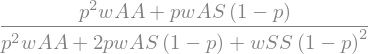

In [144]:
pt1 = (p**2 * wAA + p*(1-p)*wAS)/(p**2 * wAA + p*(1-p)*wAS + p*(1-p)*wAS + (1-p)**2 * wSS)

pt1

Calculating the difference equation, by simplifying $p^{\prime} - p$ gets us somewhere halfway, as the numerator could still be simplified further:

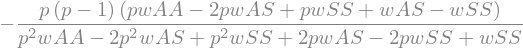

In [145]:
ans4a1=factor(pt1-p)

ans4a1

Unfortunately, further simplifying is not possible in `sympy`.

### Exercise 4b: finding equilibria
Find the equilibria of the system. To do so, we set $\Delta p = 0$ and substitute for $p=\hat{p}$:

\begin{align}
\Delta p &= \hat{p} \left (1-\hat{p} \right ) \frac{ \hat{p} w_{AA} + (1-\hat{p}) w_{AS} - \left [\hat{p} w_{AS} + (1-\hat{p}) w_{SS} \right ] }{
\hat{p}^{2} w_{AA} + 2 \hat{p} (1-\hat{p}) w_{AS} +  (1-\hat{p})^{2} w_{SS}} = 0\\
\end{align}

Dividing out the strictly positive term \begin{align}\hat{p} \left (1-\hat{p} \right ) / \bar{w} = \frac{\hat{p} \left (1-\hat{p} \right )}{
\hat{p}^{2} w_{AA} + 2 \hat{p} (1-\hat{p}) w_{AS} +  (1-\hat{p})^{2} w_{SS}}\end{align} 
from the equation above (these terms yield the equilibria $\hat{p}=0,1$) we have

\begin{align}
\hat{p} w_{AA} + (1-\hat{p}) w_{AS} - \left [\hat{p} w_{AS} + (1-\hat{p}) w_{SS} \right ]  = 0.
\end{align}

Collecting factors of $p$:
\begin{align}
\hat{p} \left [ w_{AA} - 2 w_{AS} + w_{SS} \right ] + w_{AS} - w_{SS} = 0.
\end{align}

Subtracting $w_{AS} - w_{SS}$ from both sides:
\begin{align}
\hat{p} \left [ w_{AA} - 2 w_{AS} + w_{SS} \right ] = - w_{AS} + w_{SS} 
\end{align}

Dividing by $w_{AA} - 2 w_{AS} + w_{SS}$:
\begin{align}
\hat{p} = \frac{- w_{AS} + w_{SS}}{ w_{AA} - 2 w_{AS} + w_{SS}}
\end{align}

Multiplying both sides by $\frac{-1}{-1} = 1$:
\begin{align}
\hat{p} = \frac{w_{AS} - w_{SS}}{ -w_{AA} + 2 w_{AS} - w_{SS}}
\end{align}

Hence our three equilibria are:
\begin{align}
\hat{p} &= 0 \\
\hat{p} &= 1 \\
\hat{p} &= \frac{w_{AS} - w_{SS}}{ -w_{AA} + 2 w_{AS} - w_{SS}}
\end{align}

### Exercise 4b in `sympy`

We use the solve command on the previously found difference equation, which is contained in the variable `ans4a1`:

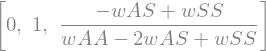

In [146]:
ex4b_equilibria=solve(ans4a1,p)

ex4b_equilibria

which are our three equilibria.

### Exercise 4c
Produce two graphs that plot the dynamics of the diploid system for all values of $p$ (I guess McE&B mean a cobweb plot again). The first graph assumes $w_{AA}=0.9$, $w_{AS} = 1$ and $w_{SS} = 0.5$. Here goes:

In [147]:
# define a function that gives the diploid recursion equation
# defining means not yet using, but just building the function for later use
def diploid_recursion(px, wAA, wAS, wSS):
    return((px**2*wAA + px*(1-px)*wAS)/(px**2*wAA + 2*px*(1-px)*wAS + (1-px)**2*wSS))

# now give the actual function a test, just for one value of p, we should get a value between 0 and 1:
diploid_recursion(px=0.5, wAA=0.9, wAS=1, wSS=0.5)

#### Ex4c: First graph

Now use `plot_cobweb()` (see above) to plot the dynamics of the diploid recursion:

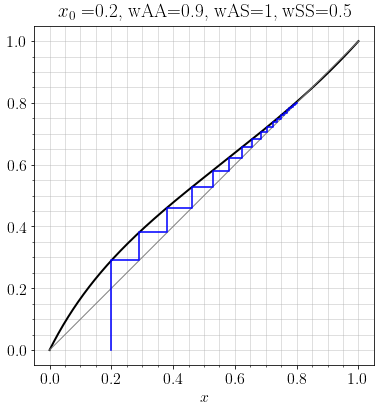

In [148]:
plot_cobweb(f=diploid_recursion,
            parameters={"wAA":0.9,"wAS":1,"wSS":0.5},
            starting_value=0.2,
            xrange=(0,1))

You see that the iteration stops near the point $\hat{p}\approx 0.8$ which is no coincidence because the equilibrium $\left . \frac{w_{AS} - w_{SS}}{ -w_{AA} + 2 w_{AS} - w_{SS}} \right |_{w_{AA} = 0.9,w_{AS}=1,w_{SS}=0.5} = 0.83333$. To find this exact value of the internal equilibrium, let's substitute for parameters in the equilibria found by sympy above, by using sympy's [`subs()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.basic.Basic.subs) function:

In [149]:
# take the intermediate equilibrium out of the list of equilibria
# it is located at the 3rd position, which can be found at index [2]
# as python starts to count from 0:
intermediate_equilibrium = ex4b_equilibria[2]

intermediate_equilibrium.subs({"wAA":0.9,"wAS":1,"wSS":0.5})

Hence evolution stops at a internal (also called 'polymorphic') equilibrium ($0<\hat{p}<1$) where both alleles $A$ and $S$ are maintained. This is because the fitness of the heterozygote $w_{AS}$ is higher than that of both heterozygotes, $w_{AA}$ and $w_{SS}$.

#### Ex4c: Second graph

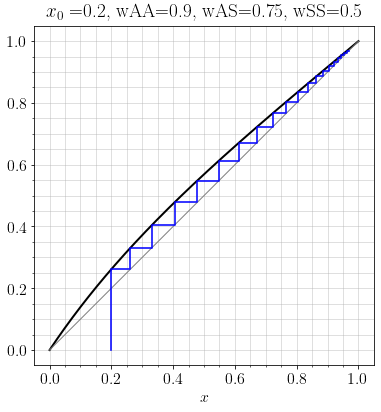

In [150]:
plot_cobweb(f=diploid_recursion,
            parameters={"wAA":0.9,"wAS":0.75,"wSS":0.5},
            starting_value=0.2,
            xrange=(0,1))

We see now that evolution progresses all the way to the monomorphic equilibrium $\hat{p} = 1$ where $A$ is the only allele that persists. This is because the fitness of the $A$ homozygote, $w_{AA}$, is higher than the fitnesses of the two other genotypes.

### Exercise 4d
Use the graphical method to prove that the internal equilibrium is only stable when $w_{AS}>w_{AA},w_{SS}$.

Sorry but I will just calculate stability analytically and be done with it. Here goes:


First calculate the derivative $\frac{\mathrm{d} p^{\prime}}{\mathrm{d} p}$, where we previously computed $p^{\prime}$ in the variable `pt1`:

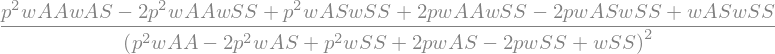

In [151]:
dpt1_dp=factor(diff(pt1,p))

dpt1_dp

Now substitute for $p = \hat{p} = \frac{w_{AS} - w_{SS}}{ -w_{AA} + 2 w_{AS} - w_{SS}}$:

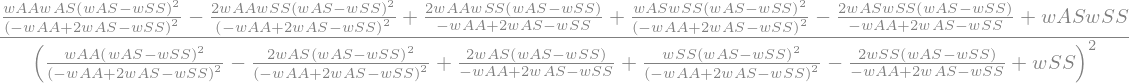

In [152]:
dpt1_dp_internal=dpt1_dp.subs(p,(wAS-wSS)/(2*wAS - wAA - wSS))

dpt1_dp_internal

Woah, complicated. Let's use [`factor()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.expr.Expr.factor) to simplify this expression:

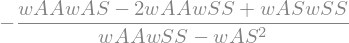

In [153]:
factor(dpt1_dp_internal)

Still rather complicated. Are there any other ways to know the stability of the internal equilibrium? Yes, by looking at the stability of both monomorphic equilibria $\hat{p} = 0$ and $\hat{p} = 1$. For $\hat{p} = 0$, the value of the derivative $\left . \frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} \right |_{p = \hat{p} = 0}$ is:

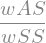

In [154]:
dpt1_dp_pure0=dpt1_dp.subs(p,0)

dpt1_dp_pure0

Aha, when $w_{AS} \geq w_{SS}$ then  $\left . \frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} \right |_{p = \hat{p} = 0} \geq 1$, so then $\hat{p}$ is unstable. Now do the same for $\hat{p} = 1$:

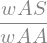

In [155]:
dpt1_dp_pure1=dpt1_dp.subs(p,1)

dpt1_dp_pure1

Aha, when $w_{AS} \geq w_{AA}$ then  $\left . \frac{\mathrm{d}p^{\prime}}{\mathrm{d} p} \right |_{p = \hat{p} = 1} \geq 1$, so then $\hat{p}$ is unstable.

Hence the internal equilibrium is stable when both monomorphic equilibria are unstable. This is the case when $w_{AS}>w_{AA},w_{SS}$. This makes sense as when the heterozygote has a greater fitness, selection will favor maintenance of both $A$ and $S$ in one and the same individual, resulting in polymorphism.

# Exercise 5

So, we have two seasons, wet and dry, which I give subscripts $w$ and $d$ respectively. 

### Specifying recursions for dry and wet seasons
In the dry season, we have the recursion

\begin{align}
p^{\prime} = \frac{p w_{A,d}}{\bar{w}_{d}},
\end{align}
where $\bar{w}_{d} = p w_{A,d} + (1-p) w_{B,d}$. 

In the following wet season, we have the recursion
\begin{align}
p^{\prime \prime} &=\frac{ p^{\prime} w_{A,w} }{\bar{w}_{w}\left(p^{\prime}\right)},
\end{align}
where $\bar{w}_{w}\left(p^{\prime}\right) = p^{\prime} w_{A,w} + \left (1 - p^{\prime} \right ) w_{B,w}$.  
I write $\bar{w}_{w}\left(p^{\prime}\right)$ to not have us forget that this is a function of $p^{\prime}$ rather than $p$.

### Writing the recursion in terms of $p$ rather than $p^{\prime}$
Substituting for $p^{\prime} = \frac{p w_{A,d}}{\bar{w}_{d}}$ in the numerator of the equation for $p^{\prime \prime}$, we have
\begin{align}
p^{\prime \prime} &=\frac{ p w_{A,d} w_{A,w} }{\bar{w}_{d} \bar{w}_{w}\left(p^{\prime}\right)}.
\end{align}

To further simplify, let us write $\bar{w}_{w}\left(p^{\prime}\right)$ in terms of $p$, by substituting for $p^{\prime} = \frac{p w_{A,d}}{\bar{w}_{d}}$ and $1-p^{\prime} = \frac{(1-p) w_{B,d}}{\bar{w}_{d}}$:
\begin{align}
\bar{w}_{w} \left (p^{\prime} \right ) &= p^{\prime} w_{A,w} + \left (1 - p^{\prime} \right ) w_{B,w}\\
    &= \frac{p w_{A,d}}{\bar{w}_{d}} w_{A,w} + \frac{(1-p) w_{B,d}}{\bar{w}_{d}} w_{B,w}\quad \text{hence, we can now write $\bar{w}_{w}$ in terms of $p$}:\\
 \bar{w}_{w}   &= \frac{1}{\bar{w}_{d}} \left [p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w} \right ]
\end{align}

Substituting  back to the expression of $p^{\prime \prime}$, we have
\begin{align}
p^{\prime \prime} &=\frac{ p w_{A,d} w_{A,w} }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}.
\end{align}
and we have the desired recursion.

### Write a difference equation $\Delta p = p^{\prime \prime} - p$
Subtracting $p$ we have 
\begin{align}
\Delta p &=\frac{ p w_{A,d} w_{A,w} }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}} - p.
\end{align}

Bring everything under the same common denominator
\begin{align}
\Delta p &=\frac{ p w_{A,d} w_{A,w} }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}} - p \frac{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}.
\end{align}

Writing it as a single fraction:
\begin{align}
\Delta p &=\frac{ p w_{A,d} w_{A,w} - p \left [p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}\right]  }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}.
\end{align}

Separating out $p$:
\begin{align}
\Delta p &=p \frac{ w_{A,d} w_{A,w} - \left [p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}\right]  }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}} \\
&=p \frac{ w_{A,d} w_{A,w} - p w_{A,d} w_{A,w} - (1-p) w_{B,d} w_{B,w}  }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}
\end{align}

Clubbing terms of $w_{A,d} w_{A,w}$:
\begin{align}
\Delta p &=p \frac{ w_{A,d} w_{A,w} (1 - p) - (1-p) w_{B,d} w_{B,w}  }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}
\end{align}

Separating out $1- p$:
\begin{align}
\Delta p &=p (1-p) \frac{ w_{A,d} w_{A,w}- w_{B,d} w_{B,w}  }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}
\end{align}

And we have our difference equation.

### Solve for equilibria
We then set $\Delta p = 0$. Looking at the equation above, we find that this holds when $\hat{p} = 0$, $\hat{p} = 1$ and when $w_{A,d} w_{A,w} = w_{B,d} w_{B,w}$ (i.e., no natural selection). Hence, again there are only two equilibra, just as in the haploid model without seasonality.

### Calculate stability of the equilibria in a seasonal environment
We then calculate the stability of the equilibria for the parameter values $w_{A,d} = w_{A,w} = 1$ and $w_{B,d} = 0.2$ and $w_{B,w} = 2$. 

Let us calculate the derivative 
\begin{align}
\frac{\mathrm{d} p^{\prime \prime}}{\mathrm{d} p} = \frac{\mathrm{d}}{\mathrm{d} p}\left [ \frac{ p w_{A,d} w_{A,w} }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}} \right ].
\end{align}

The derivative of a fraction $f(p) = \frac{g(p)}{h{p}}$ is 
\begin{align}
\frac{\mathrm{d}}{\mathrm{d}p}\left [ \frac{g(p)}{h{p}} \right ] = \frac{\frac{\mathrm{d}g(p)}{\mathrm{d}p} h(p) - g(p) \frac{\mathrm{d}h(p)}{\mathrm{d}p}}{h(p)^{2}}.
\end{align}

Working out terms, the numerator (here called $g(p)$) of $p^{\prime \prime} = \frac{ p w_{A,d} w_{A,w} }{p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}}$ can we worked out as:
\begin{align}
g(p) &=  p w_{A,d} w_{A,w}\\
\frac{\mathrm{d}g(p)}{\mathrm{d}p} &= w_{A,d} w_{A,w}\\
\end{align}
while the denominator of $p^{\prime \prime}$ (here called $h(p)$) is worked out as:
\begin{align}
h(p) &= p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}\\
\frac{\mathrm{d}h(p)}{\mathrm{d}p} &= w_{A,d} w_{A,w} - w_{B,d} w_{B,w}
\end{align}

Hence, we have 
\begin{align}
\frac{\mathrm{d} p^{\prime \prime}}{\mathrm{d} p} &= \frac{\frac{\mathrm{d}g(p)}{\mathrm{d}p} h(p) - g(p) \frac{\mathrm{d}h(p)}{\mathrm{d}p}}{h(p)^{2}}\\ 
&= \frac{w_{A,d} w_{A,w} \left (p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}\right) - p w_{A,d} w_{A,w}\left (w_{A,d} w_{A,w} - w_{B,d} w_{B,w}\right) }{\left(p w_{A,d} w_{A,w} + (1-p) w_{B,d} w_{B,w}\right)^{2}}
\end{align}

Rather than simplifying, let us immediately substitute for $\hat{p} = 0$ (substituting for terms that are 0 is always great, as it simplifies massively):
\begin{align}
\left . \frac{\mathrm{d} p^{\prime \prime}}{\mathrm{d} p} \right |_{\hat{p} = 0} &= \frac{w_{A,d} w_{A,w} w_{B,d} w_{B,w}}{\left(w_{B,d} w_{B,w}\right)^{2}}\\
&= \frac{w_{A,d} w_{A,w}}{w_{B,d} w_{B,w}}
\end{align}

### Exercise 5: Interpretation
Hence when $w_{A,d} w_{A,w} > w_{B,d} w_{B,w}$, the complete $B$ equilibrium ($\hat{p} = 0$) will be unstable, as $\left . \frac{\mathrm{d} p^{\prime \prime}}{\mathrm{d} p} \right |_{\hat{p} = 0} \geq 1$.

For the parameter values $w_{A,d}=w_{A,w}=1$ and $w_{B,d}=0.2$ and $w_{B,w}$ = 2 we have $w_{A,d} w_{A,w}=1$ and $ w_{B,d} w_{B,w} = 0.4$. Hence, $w_{A,d} w_{A,w} > w_{B,d} w_{B,w}$ applies, so that $B$ will indeed be eliminated and allele $A$ prevails.

How can you reconcile this with the fact that $B$ has higher average fitness? It is the product of fitness terms (i.e., the geometric mean fitness) that matters in temporally fluctating environments, rather than the weighted sum of fitness terms (i.e., the arithmetic mean). See also [Starrfelt & Kokko 2012 Biol Rev](https://doi.org/10.1111/j.1469-185X.2012.00225.x)